# Common Libraries

In [8]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from sklearn.decomposition import PCA, KernelPCA
import util

# Load Dataset


Read the date, and 8 yields (1,2,3,5,10,20,30 year) in to a data frame.
Then filter out any rows with null values for any of the above 8 yields.
Make the Date the index in this input data frame.
Find, the end of month dates for the year range of the input data frame.
Filter and keep only the rows for the end of the month date.


No handles with labels found to put in legend.
                 1YR       2YR       3YR       5YR      10YR      15YR  \
Date                                                                     
1991-01-31  0.096645  0.096847  0.097711  0.097776  0.098844  0.101392   
1991-02-28  0.093639  0.092892  0.092546  0.092410  0.095648  0.099330   
1991-04-30  0.089674  0.090643  0.091149  0.092221  0.095680  0.099034   
1991-05-31  0.089631  0.090563  0.091175  0.092738  0.096081  0.099335   
1991-07-31  0.088824  0.091710  0.093664  0.095759  0.099065  0.102027   
...              ...       ...       ...       ...       ...       ...   
2019-05-31  0.016604  0.014384  0.013775  0.013786  0.015153  0.016886   
2019-07-31  0.016788  0.015752  0.015112  0.014651  0.015100  0.016446   
2019-09-30  0.017375  0.015775  0.014942  0.013982  0.013818  0.014901   
2019-10-31  0.016895  0.015283  0.014712  0.014242  0.014355  0.015524   
2019-12-31  0.017693  0.016965  0.016799  0.016854  0.017245  0.0

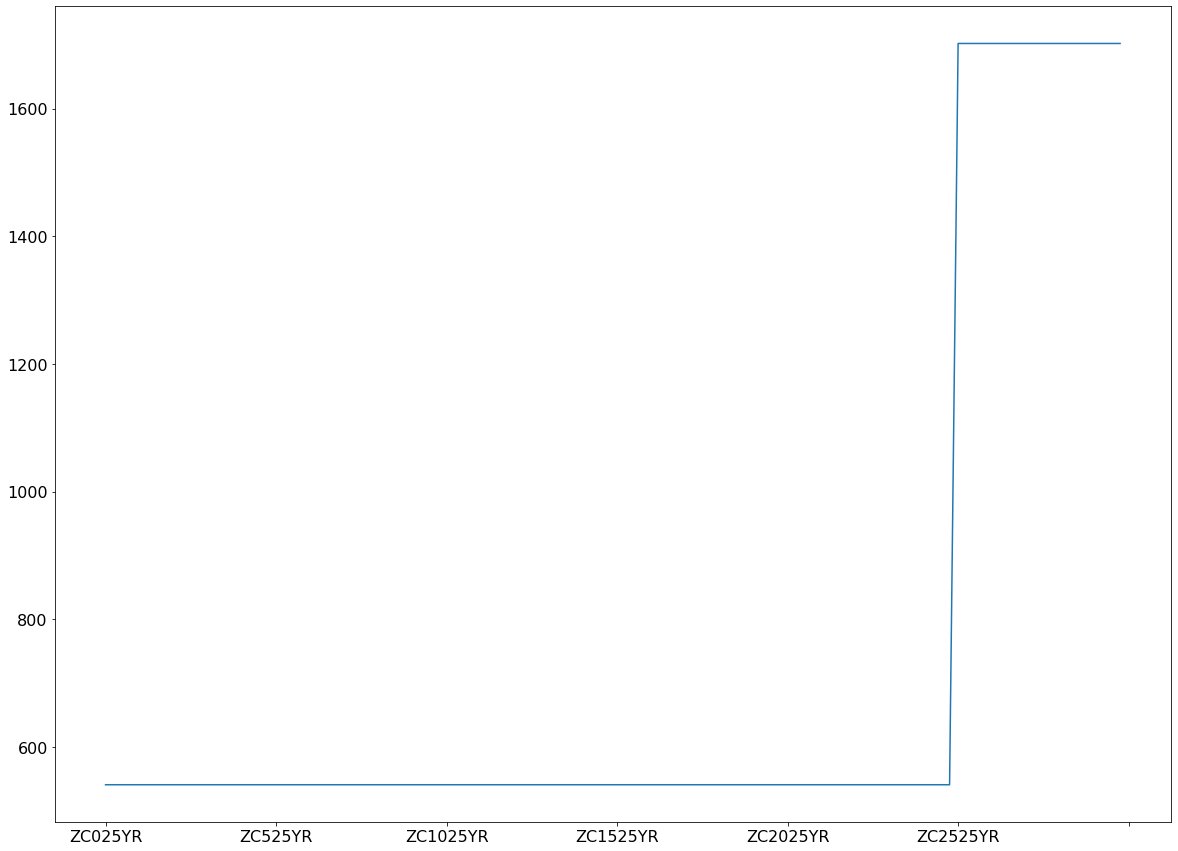

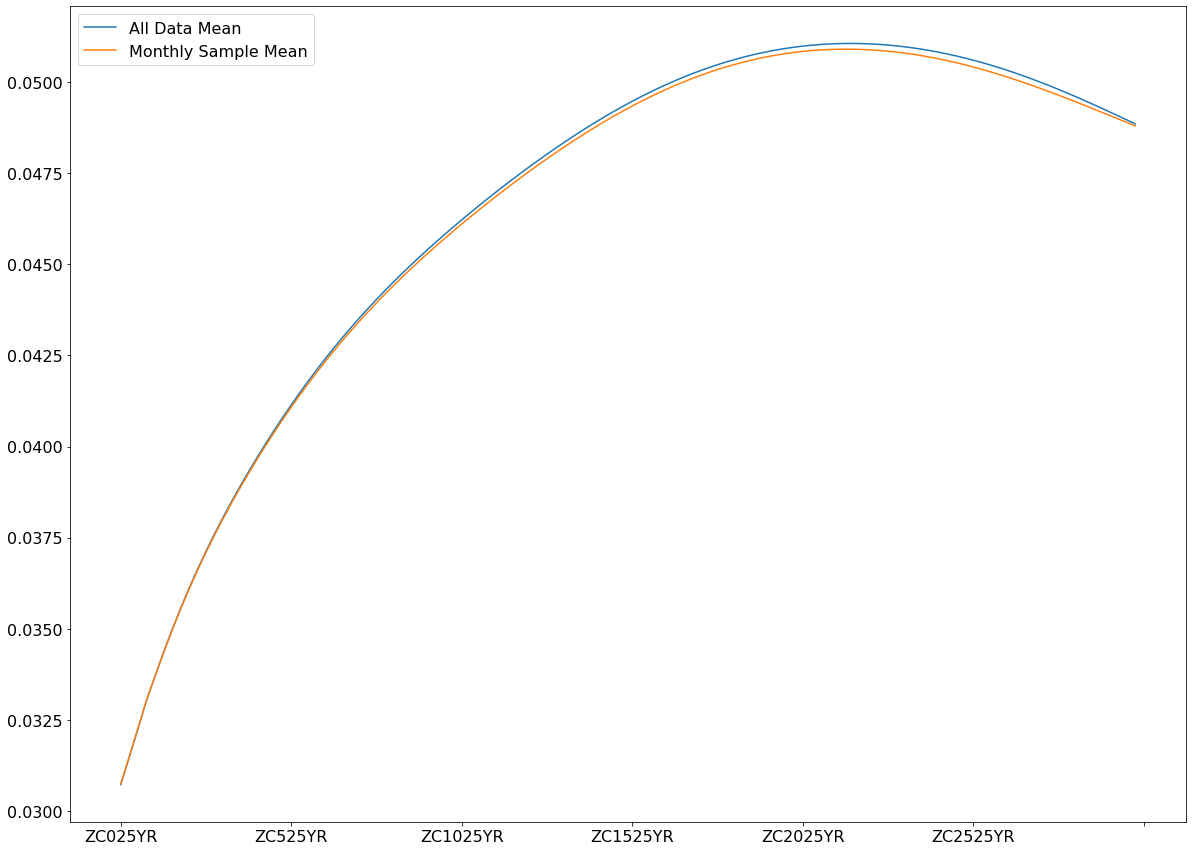

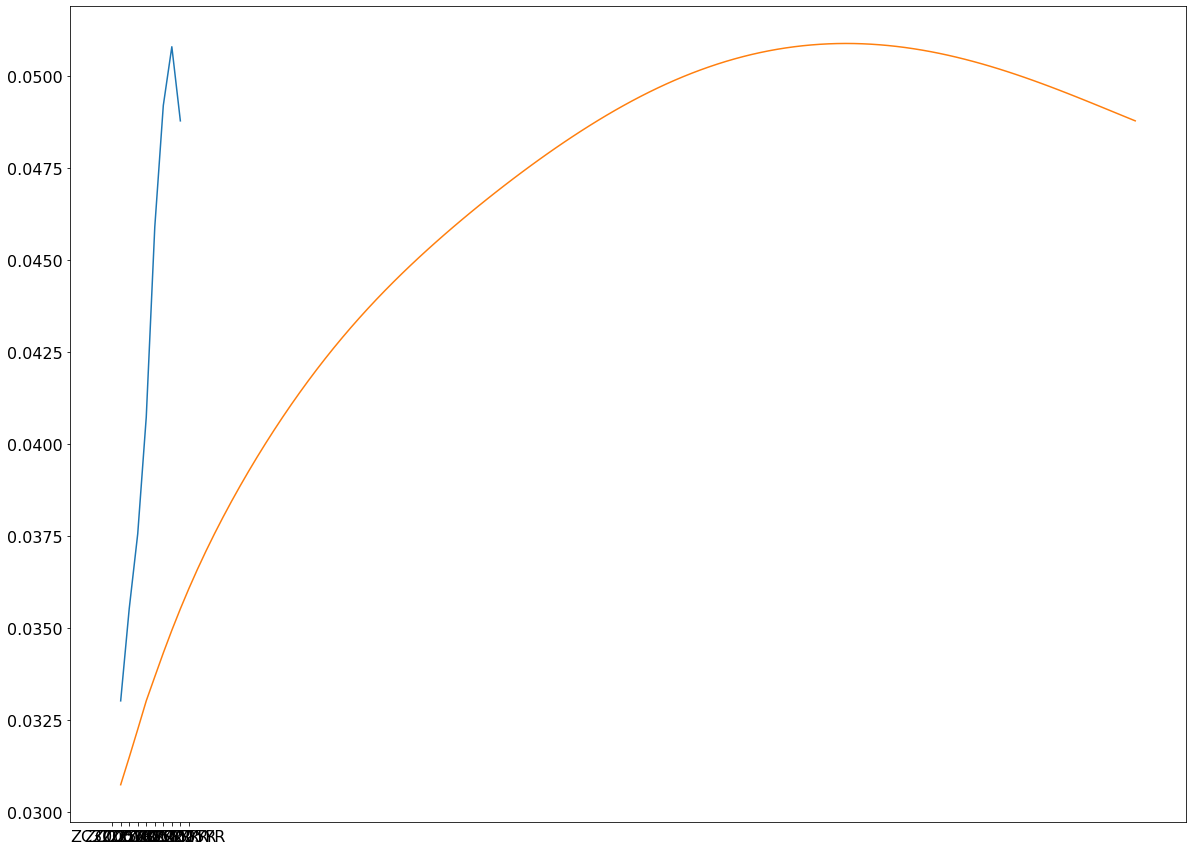

In [9]:
%matplotlib inline
df = pd.read_csv('yield_curves.csv', sep=' *, *')
df = df.replace({'na': np.nan})
df = df.apply(pd.to_numeric, errors='ignore')

# Remove the last column due to the last comman
df = df.iloc[:, :-1]
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df.set_index('Date', drop=True, inplace=True)
# Sum the NA per column and plot
na_count = df.isna().sum()
plt.figure(figsize=(20,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(prop={"size":30})
na_count.plot()
plt.savefig("yield_nan.png")
#plt.close()

df = df.dropna()

#df.set_index('Date', drop=True, inplace=True)

df_mean = df.mean()

#df_selected_yields = df.loc[:,["Date", "ZC100YR", "ZC200YR", "ZC300YR", "ZC500YR", "ZC1000YR", "ZC1500YR", "ZC2000YR", "ZC3000YR"]]
#df_selected_yields = df_selected_yields.dropna()
#df_selected_yields.columns = ["Date", "1YR", "2YR", "3YR", "5YR", "10YR", "15YR", "20YR", "30YR"]


min_year = df.index.min().year
max_year = df.index.max().year

last_day_of_month = util.lastdayofmonth(min_year, max_year)
last_day_of_month.set_index('Date', drop=True, inplace=True)

i1 = df.index
i2 = last_day_of_month.index
df_monthly_samples = df[i1.isin(i2)]


df_monthly_samples_mean = df_monthly_samples.mean()

plt.figure(figsize=(20,15))
plt.legend(prop={"size":60})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = df_mean.plot()
#ax.clear()

df_monthly_samples_mean.plot(ax=ax)
#plt.close()
plt.legend(labels=["All Data Mean", "Monthly Sample Mean"], fontsize=16)
plt.savefig("yield_mean.png")

df_selected_yields = df_monthly_samples.loc[:,["ZC100YR", "ZC200YR", "ZC300YR", "ZC500YR", "ZC1000YR", "ZC1500YR", "ZC2000YR", "ZC3000YR"]]
df_selected_yields.columns = ["1YR", "2YR", "3YR", "5YR", "10YR", "15YR", "20YR", "30YR"]
print(df_selected_yields)
df_selected_yields_mean = df_selected_yields.mean()

plt.figure(figsize=(20,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
df_selected_yields_mean.plot()
df_monthly_samples_mean.plot()
# ax = df_monthly_samples_mean.plot()
# df_selected_yields_mean.plot(ax=ax)
# print(type(df_monthly_samples_mean))
# print(df_monthly_samples_mean)
# plt.legend(labels=["All maturities mean curve", "Selected 8 maturities mean curve"])
plt.savefig("yield_mean_vs_8.png")
##df_selected_yields = df_selected_yields.dropna()

#df_selected_yields.columns = ["1YR", "2YR", "3YR", "5YR", "10YR", "15YR", "20YR", "30YR"]

# df_selected_yields['Date'] = pd.to_datetime(df_selected_yields['Date'],infer_datetime_format=True)
# df_selected_yields.set_index('Date', drop=True, inplace=True)

# min_year = df_selected_yields.index.min().year
# max_year = df_selected_yields.index.max().year

# last_day_of_month = util.lastdayofmonth(min_year, max_year)
# last_day_of_month.set_index('Date', drop=True, inplace=True)

# i1 = df_selected_yields.index
# i2 = last_day_of_month.index
# df_selected_yields = df_selected_yields[i1.isin(i2)]



# Visualizing the Dataset

Plot the 8 yields against the Date

1YR     0.033024
2YR     0.035526
3YR     0.037565
5YR     0.040738
10YR    0.045905
15YR    0.049211
20YR    0.050808
30YR    0.048794
dtype: float64
                10YR      15YR      20YR      30YR
Date                                              
1991-01-31  0.098844  0.101392  0.099008  0.116263
1991-02-28  0.095648  0.099330  0.097396  0.115292
1991-04-30  0.095680  0.099034  0.097619  0.107943
1991-05-31  0.096081  0.099335  0.098099  0.097569
1991-07-31  0.099065  0.102027  0.099513  0.099343


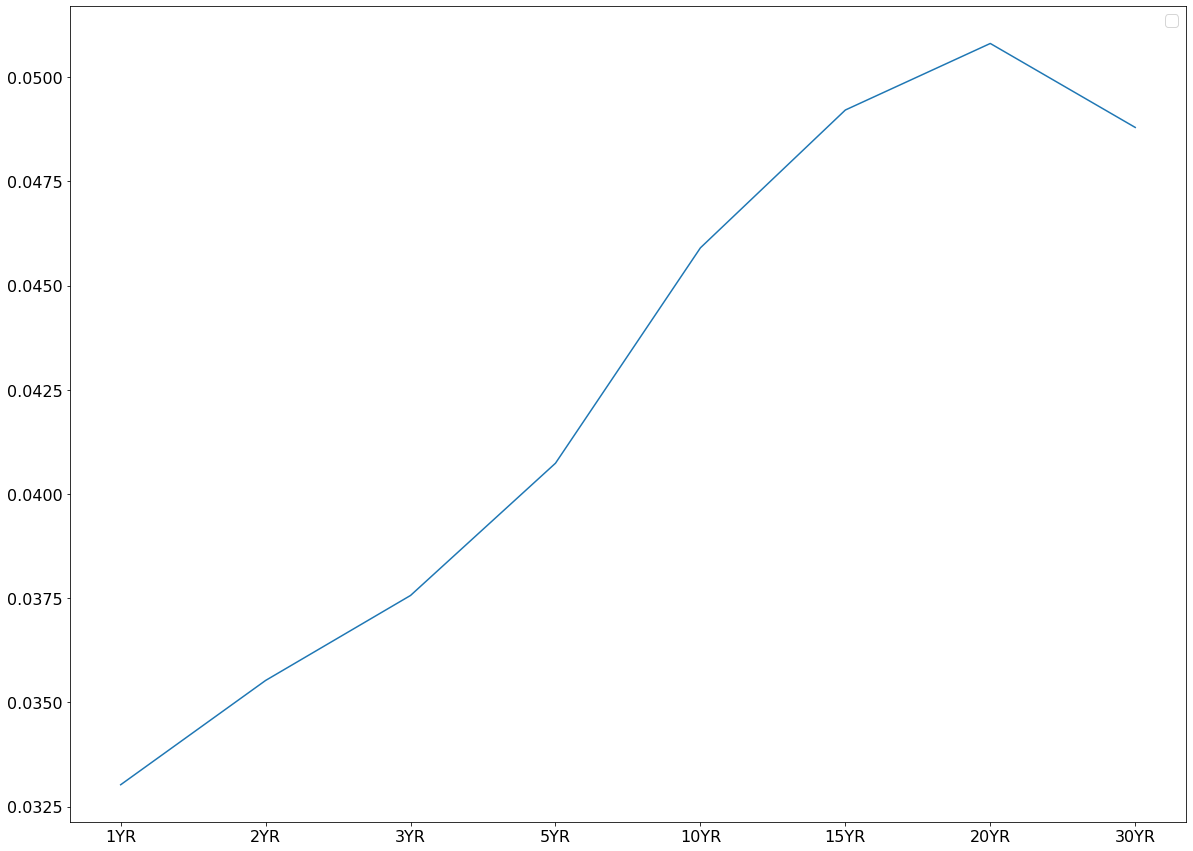

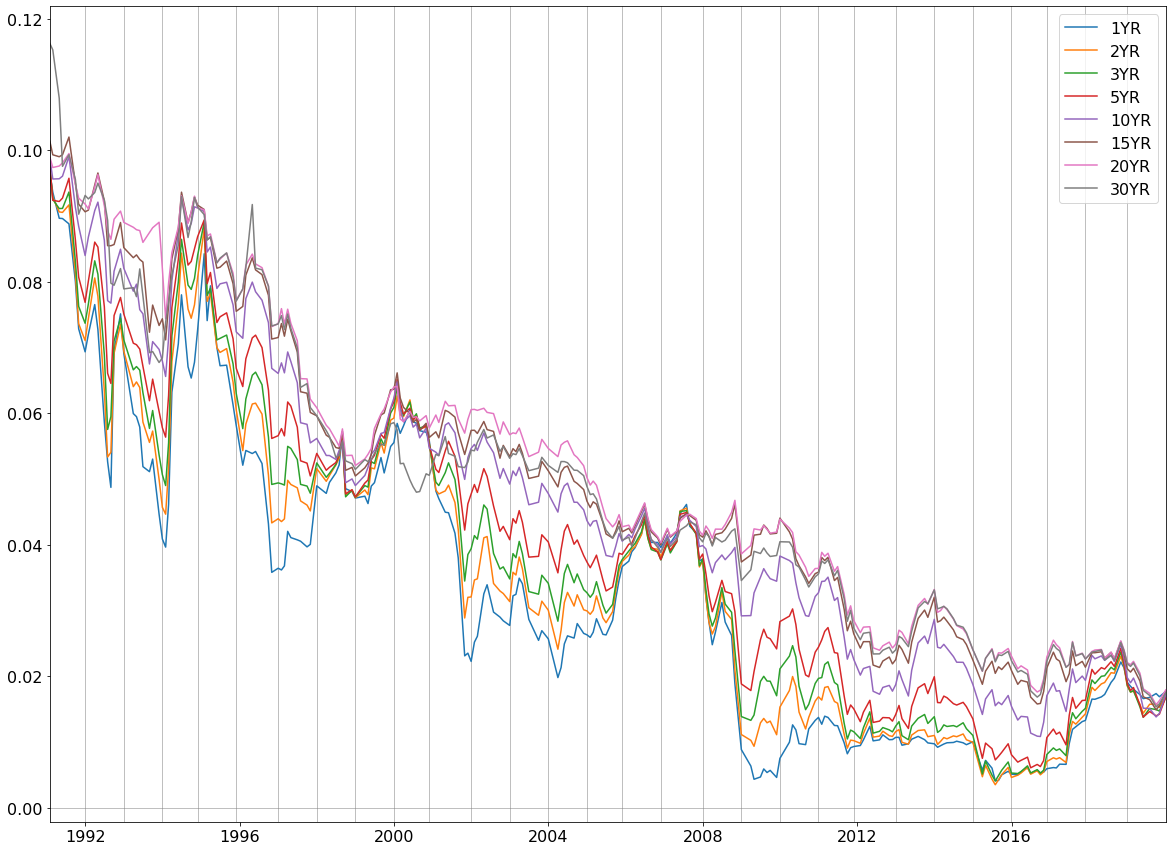

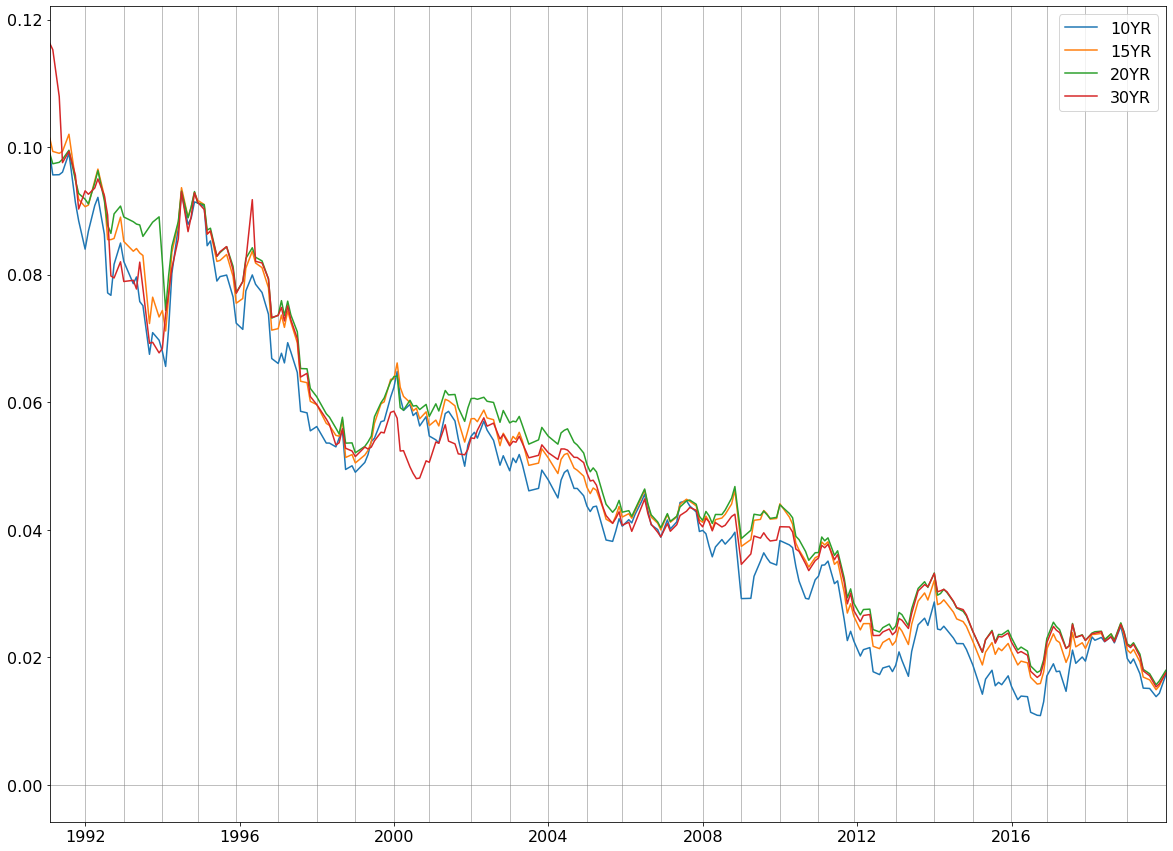

In [10]:
plt.figure(figsize=(20,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(labels=["1YR", "2YR", "3YR", "5YR", "10YR", "15YR", "20YR", "30YR"], fontsize=16)
df_selected_yields_mean = df_selected_yields.mean()
df_selected_yields_mean.columns = ["Date", "1YR", "2YR", "3YR", "5YR", "10YR", "15YR", "20YR", "30YR"]
print(df_selected_yields_mean)
#df_selected_yields_mean.plot()
#plt.plot(df_selected_yields_mean.index, df_selected_yields_mean)
plt.plot(df_selected_yields_mean)
plt.savefig("mean_yield_curve.png")

plt.figure(figsize=(20,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_selected_yields.index, df_selected_yields)
plt.xlim(df_selected_yields.index.min(), df_selected_yields.index.max())
plt.axhline(y=0,c="grey",linewidth=0.5,zorder=0)
plt.legend(labels=["1YR", "2YR", "3YR", "5YR", "10YR", "15YR", "20YR", "30YR"], fontsize=16)
for i in range(df_selected_yields.index.min().year, df_selected_yields.index.max().year+1):
    plt.axvline(x=df_selected_yields.index[df_selected_yields.index.searchsorted(pd.datetime(i,1,1))-1],
                c="grey", linewidth=0.5, zorder=0)
plt.savefig("yield_curves.png")

plt.figure(figsize=(20,15))
df_selected_yields_10_3= df_selected_yields.iloc[:, 4:8]
print(df_selected_yields_10_3.head())
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_selected_yields_10_3.index, df_selected_yields_10_3)
plt.xlim(df_selected_yields_10_3.index.min(), df_selected_yields_10_3.index.max())
plt.axhline(y=0,c="grey",linewidth=0.5,zorder=0)
plt.legend(labels=["10YR", "15YR", "20YR", "30YR"], fontsize=16)
for i in range(df_selected_yields_10_3.index.min().year, df_selected_yields_10_3.index.max().year+1):
    plt.axvline(x=df_selected_yields_10_3.index[df_selected_yields_10_3.index.searchsorted(pd.datetime(i,1,1))-1],
                c="grey", linewidth=0.5, zorder=0)
plt.savefig("yield_curves_10_30.png")

1YR     0.000507
2YR     0.000531
3YR     0.000541
5YR     0.000547
10YR    0.000540
15YR    0.000539
20YR    0.000541
30YR    0.000523
dtype: float64
[9.66153000e-01 3.00006021e-02 2.28545661e-03 1.12930859e-03
 2.63240045e-04]


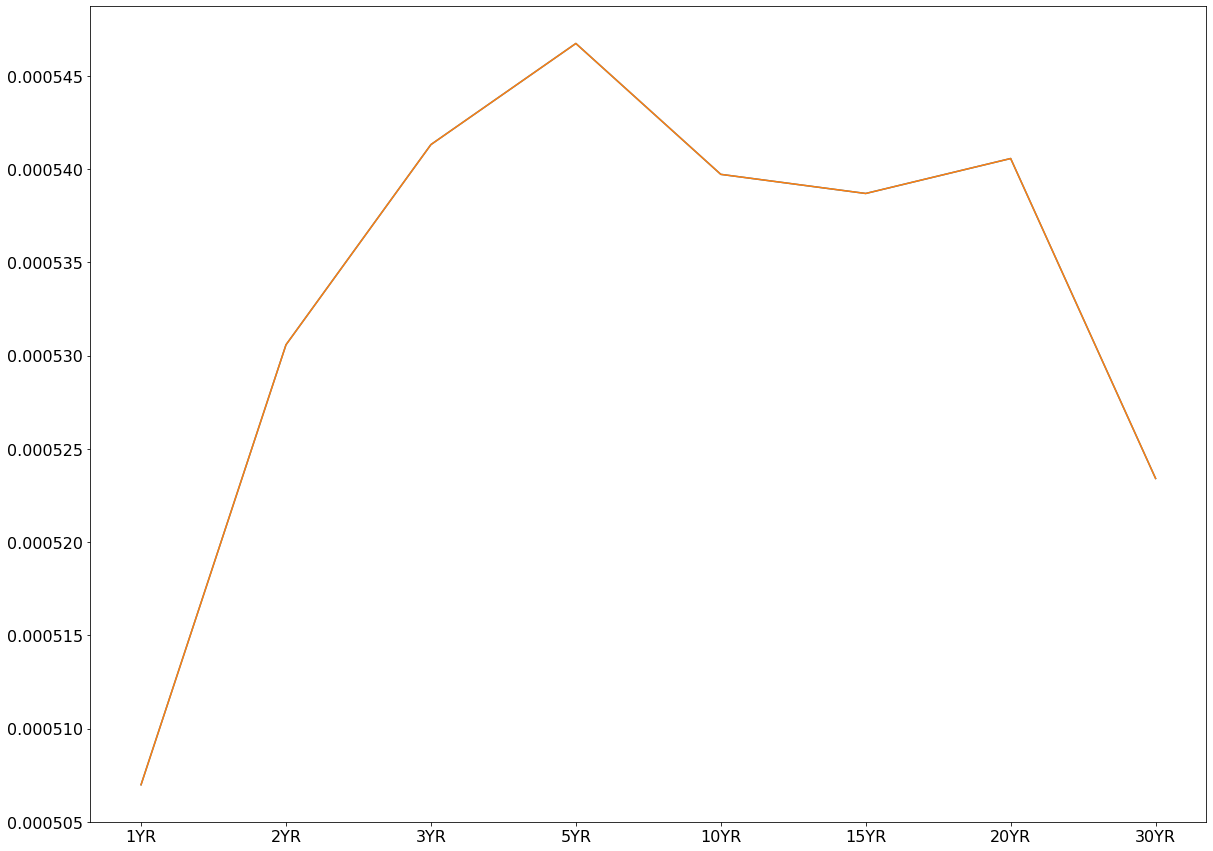

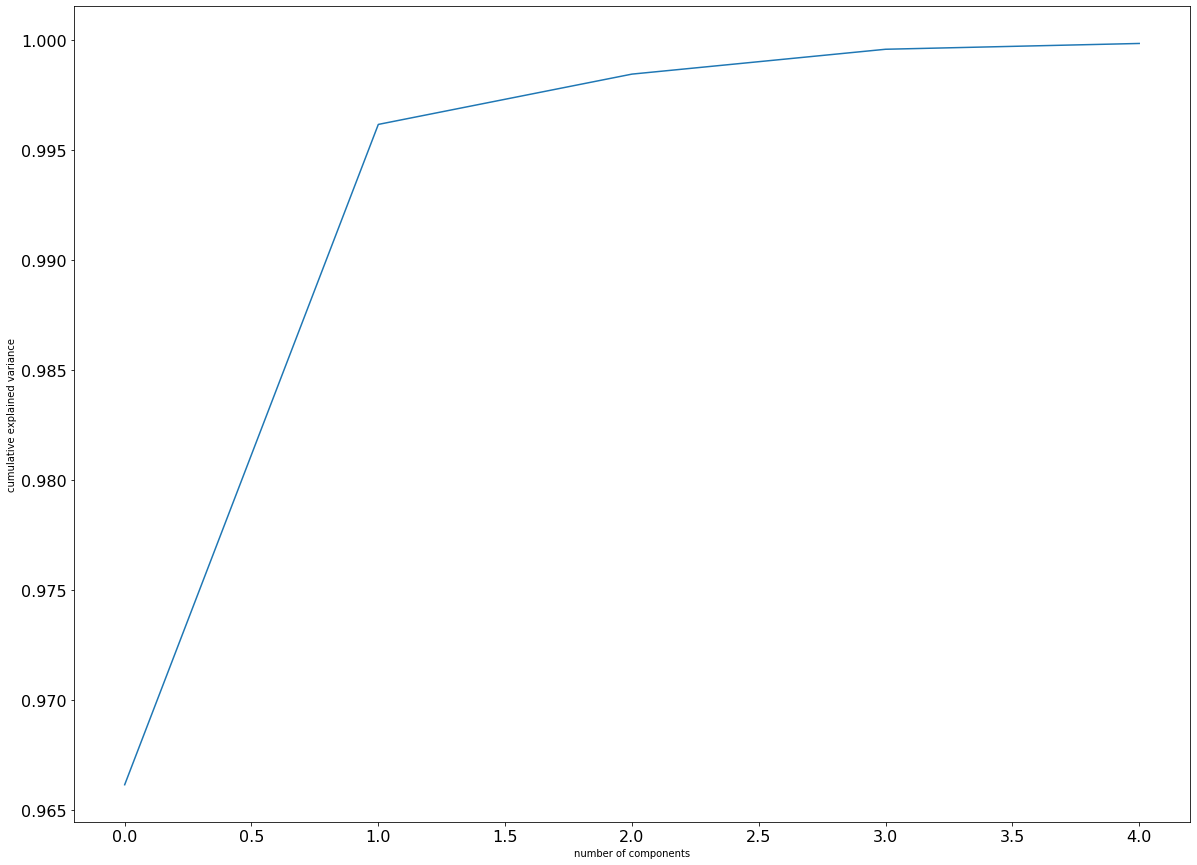

In [11]:
df_selected_yields_var = df_selected_yields.var()
print(df_selected_yields_var)
plt.figure(figsize=(20,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(labels=["All Data Mean", "Monthly Sample Mean"])
df_selected_yields_var.plot()
plt.plot(df_selected_yields_var.index, df_selected_yields_var)
plt.savefig("yield_var.png")

pca = PCA(n_components=5)
pca.fit_transform(df_selected_yields)
print (pca.explained_variance_ratio_)
plt.figure(figsize=(20,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig("pca_var.png")

# Projection onto Principal Components
Use Kernel PCA for better accuracy

# Kernel PCA

In [12]:
pcaA = KernelPCA(n_components=3,
                 kernel='rbf',
                 gamma=4,
                 kernel_params=None,
                 fit_inverse_transform=False,
                 eigen_solver='auto',
                 tol=0,
                 max_iter=None)

pcaA.fit(df_selected_yields)
dpca = pd.DataFrame(pcaA.transform(df_selected_yields))
dpca.index = df_selected_yields.index



Plot the yield against first and second PCA

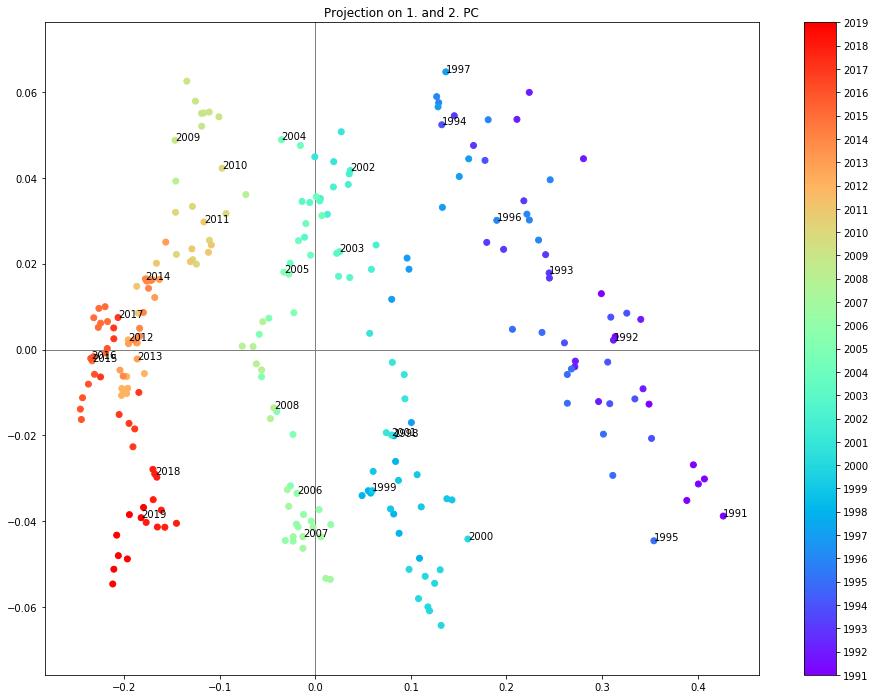

In [13]:
# plot the result
merged_years = 1
pc1 = 0
pc2 = 1
fig = plt.figure(figsize=(16,12))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)
    
sc = plt.scatter(dpca.loc[:,pc1],dpca.loc[:,pc2], c=[d.year for d in dpca.index], cmap='rainbow')
cb = plt.colorbar(sc)
cb.set_ticks(ticks=np.unique([d.year for d in dpca.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in dpca.index])[::1])

for year in range(df_selected_yields.index.min().year,df_selected_yields.index.max().year+1,merged_years):
    year_start = df_selected_yields.index[df_selected_yields.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df_selected_yields.index[df_selected_yields.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    plt.annotate('{0}'.format(year), xy=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]), xytext=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]))

None
plt.savefig("pca_projections.png")

The objective is to model how yield curve move with the changes in PCA 1.
The alogrithm (later extend to multiple output ANFIS) is using single output ANFIS and calculate each yield seperately. Therefore the error function is not optimal as with all outputs together.
For the moment, only 5 year yield is predicted.


The current state is represented by PCA. 
Change in PCA 1 is calculated by substracting from the next month PCA 1.
Expected output is change in the yield curve.


ANFIS Model
ANFIS  inputs = PC1 (t), PC2 (t), Delta PCA 1 (t + delta t)
ANFIS  output = Delta Y (t + delta t)
Each input is represented by 4 gaussian membership functions.

TODO
Modify the alogrithm to train the 8 yields together, so the ANFIS is generalized for mutliple yields
ANFIS  inputs = PC1 (t), PC2 (t), Delta PCA 1 (t + delta t)
ANFIS  output = Delta Y1 (t + delta t), Delta Y2 (t + delta t) ... Delta Y8 (t + delta t)

